In [1]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dev = qml.device("lightning.gpu",wires=2)

## Create Dataset to fit

Our dataset is generated by creating a random quantum circuit in 2 variables (x,y) which then produce a resultant measurement expval on the Pauli-Z observable (computational basis state).

$\therefore$ our function $f(x,y) \rightarrow z$ is a mapping $\mathbb{R}^2 \rightarrow \{-1,0,1\}$

In [3]:
@qml.qnode(dev)
def data_gen(x,y,weights):
    qml.RY(x,wires=0)
    qml.RY(y,wires=1)
    qml.RandomLayers(weights,wires=[0,1],ratio_imprim=0.4)
    qml.CY([1,0])
    return qml.expval(qml.Z(0))    

In [4]:
w = np.random.randn(7,2)

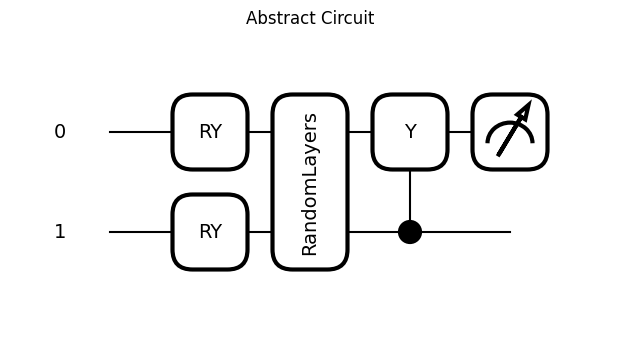

In [5]:
fig = qml.draw_mpl(data_gen)(np.random.randn(),np.random.randn(),w)
t = plt.title("Abstract Circuit")

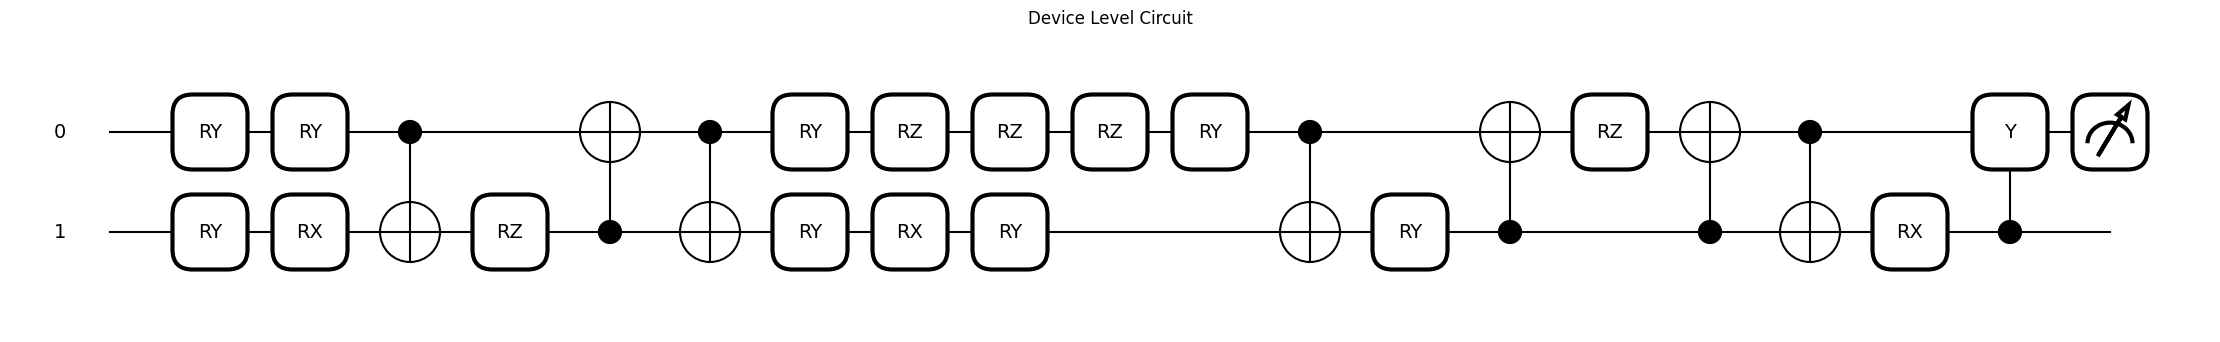

In [6]:
fig = qml.draw_mpl(data_gen,expansion_strategy="device")(np.random.randn(),np.random.randn(),w)
t = plt.title("Device Level Circuit")

**Generate dataset**

Generate a 1000 random (x,y) values and run the circuit to label them. 

In [13]:
x = np.random.randn(1024).astype(np.float32)
y = np.random.randn(1024).astype(np.float32)
labels = []
weights = np.random.randn(7,2).astype(np.float32)
for i,j in zip(x,y):
    labels.append(np.sign(data_gen(i,j,weights)))

### Plotting our dataset

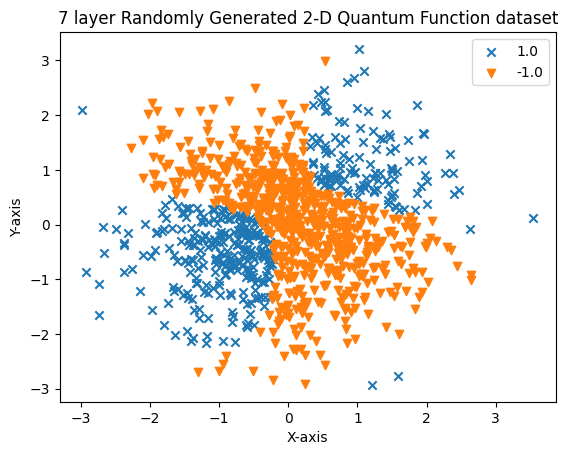

In [15]:
for label in set(labels):
    x_subset = [x_i for i, x_i in enumerate(x) if labels[i] == label]
    y_subset = [y_i for i, y_i in enumerate(y) if labels[i] == label]
    marker = 'v' if label == -1.0 else 'x'  # Example markers: 'o' for circles, 'x' for crosses
    plt.scatter(x_subset, y_subset, label=label, marker=marker)

# Add labels, title, and legend
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('7 layer Randomly Generated 2-D Quantum Function dataset')
plt.savefig("Dataset.png")

In [16]:
# np.save("./Saved_vars/x_7.npy",x)
# np.save("./Saved_vars/y_7.npy",y)
# np.save("./Saved_vars/weights_7.npy",weights)
# np.save("./Saved_vars/labels_7.npy",labels)